# Install

In [1]:
!git clone https://github.com/malhaar2002/WarpNet.git

Cloning into 'WarpNet'...
remote: Enumerating objects: 349, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 349 (delta 1), reused 10 (delta 1), pack-reused 337
Receiving objects: 100% (349/349), 125.46 MiB | 35.35 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [6]:
import wandb
wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Training

In [8]:
!python /kaggle/working/WarpNet/pix2pix/train_original.py --dataroot /kaggle/input/coco-persons-ab2/coco_persons_AB2 --name pix2pix_restoration --model pix2pix --direction AtoB --use_wandb --gpu_ids 0,1 --n_epochs 50 --n_epochs_decay 50

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: /kaggle/input/coco-persons-ab2/coco_persons_AB2	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                      

In [33]:
!zip -r checkpoints.zip latest_net_D.pth latest_net_G.pth loss_log.txt train_opt.txt web/

  adding: latest_net_D.pth (deflated 0%)
  adding: latest_net_G.pth (deflated 7%)
  adding: loss_log.txt (deflated 83%)
  adding: train_opt.txt (deflated 78%)
  adding: web/ (stored 0%)
  adding: web/index.html (deflated 97%)
  adding: web/images/ (stored 0%)
  adding: web/images/epoch068_fake_B.png (deflated 0%)
  adding: web/images/epoch031_real_B.png (deflated 0%)
  adding: web/images/epoch063_real_A.png (deflated 0%)
  adding: web/images/epoch052_real_A.png (deflated 0%)
  adding: web/images/epoch040_real_B.png (deflated 0%)
  adding: web/images/epoch025_real_A.png (deflated 0%)
  adding: web/images/epoch048_real_B.png (deflated 0%)
  adding: web/images/epoch078_fake_B.png (deflated 0%)
  adding: web/images/epoch037_fake_B.png (deflated 0%)
  adding: web/images/epoch094_fake_B.png (deflated 0%)
  adding: web/images/epoch079_real_B.png (deflated 0%)
  adding: web/images/epoch050_real_A.png (deflated 0%)
  adding: web/images/epoch061_real_B.png (deflated 0%)
  adding: web/images/epoc

# Visualize

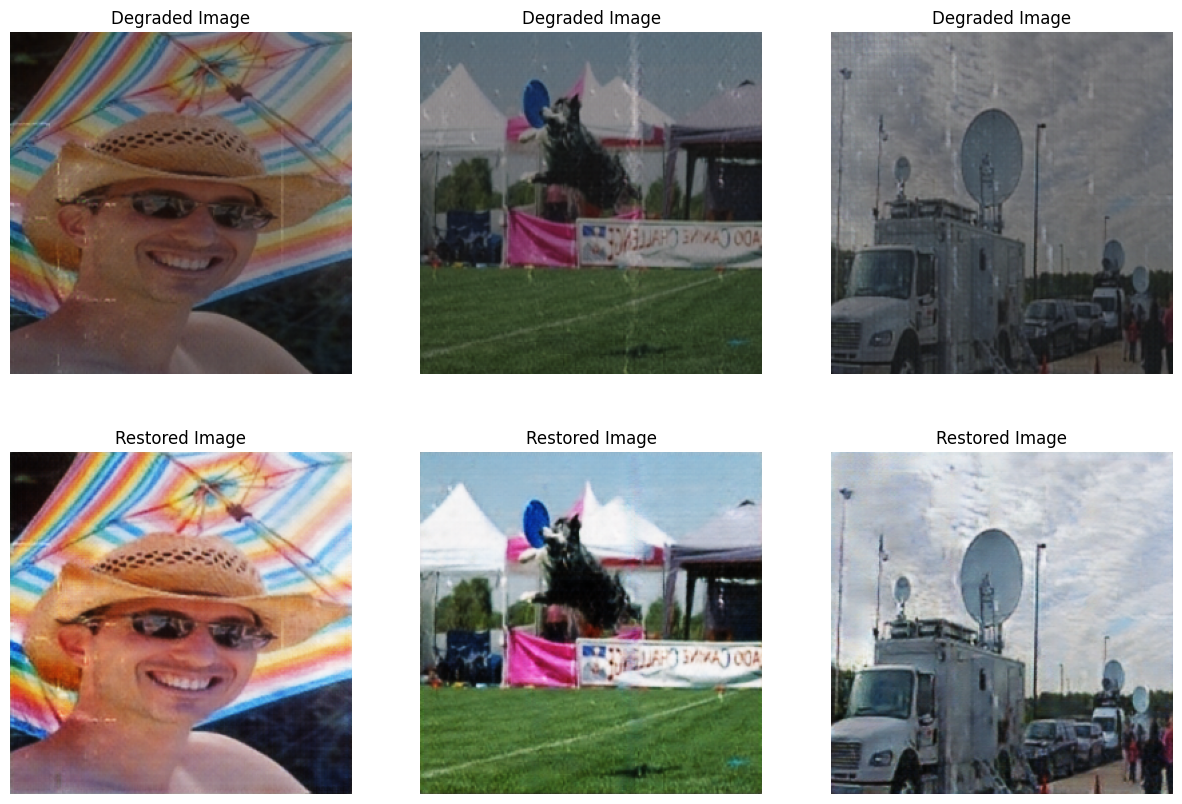

In [4]:
import matplotlib.pyplot as plt

restored_images = [r"WarpNet\pix2pix\restoration_checkpoints\web\images\epoch015_fake_B.png",r"WarpNet\pix2pix\restoration_checkpoints\web\images\epoch048_fake_B.png",r"WarpNet\pix2pix\restoration_checkpoints\web\images\epoch089_fake_B.png"]
degraded_images = [r"WarpNet\pix2pix\restoration_checkpoints\web\images\epoch015_real_A.png",r"WarpNet\pix2pix\restoration_checkpoints\web\images\epoch048_real_A.png",r"WarpNet\pix2pix\restoration_checkpoints\web\images\epoch089_real_A.png"]

# Make a grid of images to display them together one should be degraded and other should be restored
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

for i in range(3):
    ax[0, i].imshow(plt.imread(degraded_images[i]))
    ax[0, i].axis('off')
    ax[0, i].set_title('Degraded Image')

    ax[1, i].imshow(plt.imread(restored_images[i]))
    ax[1, i].axis('off')
    ax[1, i].set_title('Restored Image')

plt.show()
